In [37]:
from env import GridWorld
from agent import TD, q_learning_update, sarsa_update
import matplotlib.pyplot as plt

In [38]:
env = GridWorld(
    size=5,
    traps=[(0, 4), (1, 3), (2, 2)])
env.render()


Grid World:
A: Agent, G: Goal, T: Trap, .: Empty
A . . . T
. . . T .
. . T . .
. . . . .
. . . . G



In [39]:
agent = TD()

In [40]:
# SARSA
agent = TD()
final_steps_S = []
episode_rewards_S = []

for episode in range(100):
    state = env.reset()
    action = agent.choose_action(state)
    episode_reward = 0  # 각 에피소드마다 초기화

    for step in range(50):
        if step % 10 == 0: # visualizing frequency
            pass # breakpoint here to visualize q_table
        next_state, reward, done = env.step(action)
        next_action = agent.choose_action(next_state)
        sarsa_update(agent, state, action, reward, next_state, next_action)

        state = next_state
        action = next_action  # 선택한 action 사용

        episode_reward += reward
    
        if done:
            print(f"Episode {episode+1} 종료 step: {step+1}, 보상: {episode_reward:.2f}")
            final_steps_S.append(step+1)
            episode_rewards_S.append(round(episode_reward,2))
            break

print("학습 완료")

Episode 1 종료 step: 32, 보상: -8.10
Episode 2 종료 step: 23, 보상: -7.20
Episode 3 종료 step: 8, 보상: -5.70
Episode 4 종료 step: 31, 보상: -8.00
Episode 5 종료 step: 8, 보상: -5.70
Episode 7 종료 step: 17, 보상: -6.60
Episode 9 종료 step: 16, 보상: -6.50
Episode 14 종료 step: 10, 보상: -5.90
Episode 16 종료 step: 44, 보상: -9.30
Episode 17 종료 step: 39, 보상: 6.20
Episode 20 종료 step: 41, 보상: -9.00
Episode 21 종료 step: 30, 보상: 7.10
Episode 22 종료 step: 38, 보상: -8.70
Episode 23 종료 step: 20, 보상: 8.10
Episode 24 종료 step: 28, 보상: 7.30
Episode 25 종료 step: 22, 보상: 7.90
Episode 26 종료 step: 29, 보상: 7.20
Episode 27 종료 step: 12, 보상: 8.90
Episode 28 종료 step: 9, 보상: 9.20
Episode 29 종료 step: 8, 보상: 9.30
Episode 30 종료 step: 12, 보상: 8.90
Episode 31 종료 step: 14, 보상: 8.70
Episode 32 종료 step: 8, 보상: 9.30
Episode 33 종료 step: 13, 보상: 8.80
Episode 34 종료 step: 10, 보상: 9.10
Episode 35 종료 step: 12, 보상: 8.90
Episode 36 종료 step: 21, 보상: 8.00
Episode 37 종료 step: 12, 보상: 8.90
Episode 38 종료 step: 10, 보상: 9.10
Episode 39 종료 step: 8, 보상: 9.30
Episode 40 종

In [41]:
display(agent.q_array)
display(agent.q_array.mean(axis=1).round(2).reshape(5, 5))

array([[-0.15, -0.27, -0.29,  1.32],
       [-0.24,  2.13, -0.24, -0.23],
       [-0.22, -0.21, -0.21, -0.2 ],
       [-0.17, -0.95, -0.17, -0.5 ],
       [ 0.  ,  0.  ,  0.  ,  0.  ],
       [-0.25, -0.22, -0.23, -0.22],
       [-0.2 ,  2.98, -0.21, -0.2 ],
       [-0.19, -0.5 , -0.06, -0.5 ],
       [ 0.  ,  0.  ,  0.  ,  0.  ],
       [-0.5 ,  0.  ,  0.  ,  0.  ],
       [-0.19, -0.07, -0.19, -0.18],
       [-0.16,  4.14, -0.15, -1.35],
       [ 0.  ,  0.  ,  0.  ,  0.  ],
       [-0.95,  0.  ,  0.  ,  0.  ],
       [-0.01,  0.  ,  0.  ,  0.  ],
       [-0.15, -0.15, -0.15,  1.32],
       [-0.13, -0.01, -0.05,  4.94],
       [-1.35,  6.35,  0.07, -0.06],
       [-0.06,  1.62, -0.01, -0.02],
       [-0.01,  1.  ,  0.  ,  0.  ],
       [-0.11, -0.11, -0.12, -0.11],
       [-0.09, -0.07, -0.07,  1.45],
       [ 0.2 ,  1.77, -0.04,  7.92],
       [ 0.05,  1.86,  1.25,  9.96],
       [ 0.  ,  0.  ,  0.  ,  0.  ]])

array([[ 0.15,  0.36, -0.21, -0.45,  0.  ],
       [-0.23,  0.59, -0.31,  0.  , -0.12],
       [-0.16,  0.62,  0.  , -0.24, -0.  ],
       [ 0.22,  1.19,  1.25,  0.38,  0.25],
       [-0.11,  0.3 ,  2.46,  3.28,  0.  ]])

In [42]:
# Q learning
agent = TD()
final_steps_Q = []
episode_rewards_Q = []

for episode in range(100):
    env.reset()
    episode_reward = 0  # 각 에피소드마다 초기화

    for step in range(50):
        if step % 10 == 0: # visualizing frequency
            pass # breakpoint here to visualize q_table
        current_state = tuple(env.pos)
        action = agent.choose_action(current_state)
        next_state, reward, done = env.step(action)
        q_learning_update(agent, current_state, action, reward, next_state)
        episode_reward += reward
    
        if done:
            print(f"Episode {episode+1} 종료 step: {step+1}, 보상: {episode_reward:.2f}")
            final_steps_Q.append(step+1)
            episode_rewards_Q.append(round(episode_reward,2))
            break

print("학습 완료")

Episode 1 종료 step: 30, 보상: -7.90
Episode 2 종료 step: 23, 보상: -7.20
Episode 3 종료 step: 10, 보상: -5.90
Episode 4 종료 step: 21, 보상: -7.00
Episode 5 종료 step: 17, 보상: -6.60
Episode 7 종료 step: 14, 보상: -6.30
Episode 8 종료 step: 22, 보상: -7.10
Episode 9 종료 step: 22, 보상: -7.10
Episode 10 종료 step: 34, 보상: -8.30
Episode 13 종료 step: 26, 보상: 7.50
Episode 14 종료 step: 27, 보상: -7.60
Episode 16 종료 step: 25, 보상: 7.60
Episode 17 종료 step: 33, 보상: -8.20
Episode 18 종료 step: 18, 보상: -6.70
Episode 20 종료 step: 23, 보상: -7.20
Episode 21 종료 step: 14, 보상: 8.70
Episode 23 종료 step: 9, 보상: 9.20
Episode 24 종료 step: 17, 보상: 8.40
Episode 25 종료 step: 16, 보상: 8.50
Episode 26 종료 step: 36, 보상: 6.50
Episode 27 종료 step: 19, 보상: 8.20
Episode 29 종료 step: 17, 보상: 8.40
Episode 30 종료 step: 14, 보상: 8.70
Episode 31 종료 step: 10, 보상: 9.10
Episode 32 종료 step: 10, 보상: 9.10
Episode 33 종료 step: 8, 보상: 9.30
Episode 34 종료 step: 8, 보상: 9.30
Episode 35 종료 step: 10, 보상: 9.10
Episode 36 종료 step: 8, 보상: 9.30
Episode 37 종료 step: 13, 보상: 8.80
Episode 3

In [43]:
display(agent.q_array)
display(agent.q_array.mean(axis=1).round(2).reshape(5, 5))

array([[-0.22,  2.1 , -0.01, -0.24],
       [-0.22, -0.21, -0.21, -0.21],
       [-0.19, -0.19, -0.18, -0.18],
       [-0.15, -1.35, -0.15, -0.95],
       [ 0.  ,  0.  ,  0.  ,  0.  ],
       [-0.24,  3.29, -0.  , -0.21],
       [-0.18, -0.04, -0.17, -0.17],
       [-0.16, -0.95, -0.16, -0.5 ],
       [ 0.  ,  0.  ,  0.  ,  0.  ],
       [-0.5 ,  0.  ,  0.  ,  0.  ],
       [ 0.12,  4.45,  0.52, -0.16],
       [-0.14,  1.66, -0.13, -0.95],
       [ 0.  ,  0.  ,  0.  ,  0.  ],
       [-0.5 , -0.01,  0.  ,  0.  ],
       [-0.01,  0.  ,  0.  ,  0.  ],
       [ 0.48, -0.06, -0.13,  5.62],
       [-0.  ,  6.73,  0.61, -0.01],
       [-0.95,  1.46, -0.03, -0.04],
       [-0.02,  3.1 , -0.01, -0.01],
       [-0.01,  0.  ,  0.  ,  0.  ],
       [ 0.82, -0.06, -0.09,  0.31],
       [-0.06,  0.44, -0.07,  7.79],
       [-0.05,  1.32,  0.65,  8.82],
       [ 0.4 ,  0.45,  1.71,  9.96],
       [ 0.  ,  0.  ,  0.  ,  0.  ]])

array([[ 0.41, -0.21, -0.18, -0.65,  0.  ],
       [ 0.71, -0.14, -0.44,  0.  , -0.12],
       [ 1.23,  0.11,  0.  , -0.13, -0.  ],
       [ 1.48,  1.83,  0.11,  0.77, -0.  ],
       [ 0.24,  2.02,  2.68,  3.13,  0.  ]])

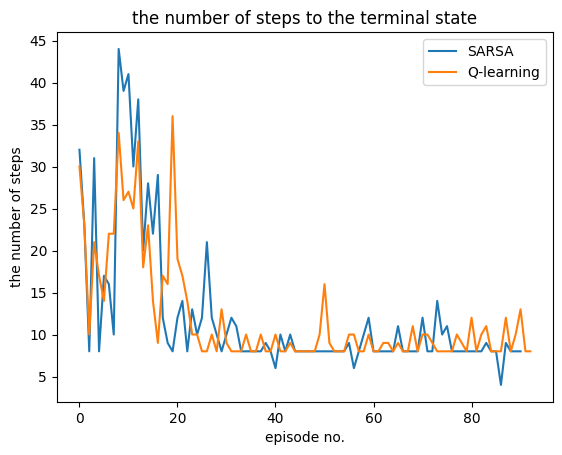

In [50]:
plt.plot(final_steps_S, label='SARSA')
plt.plot(final_steps_Q, label='Q-learning')
plt.title('the number of steps to the terminal state')
plt.xlabel('episode no.')
plt.ylabel('the number of steps')
plt.legend()
plt.show()


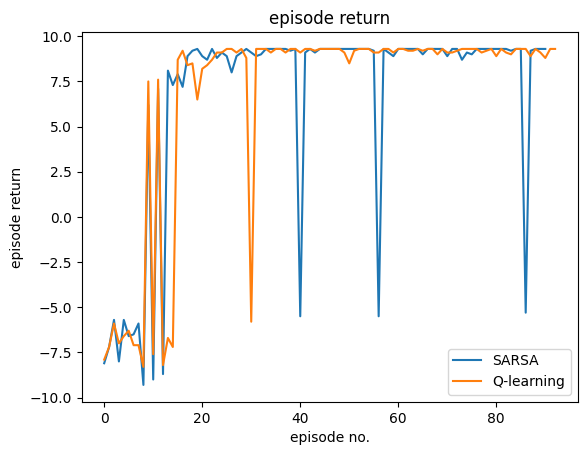

In [51]:
plt.plot(episode_rewards_S, label='SARSA')
plt.plot(episode_rewards_Q, label='Q-learning')
plt.title('episode return')
plt.xlabel('episode no.')
plt.ylabel('episode return')
plt.legend()
plt.show()
